In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pickle
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

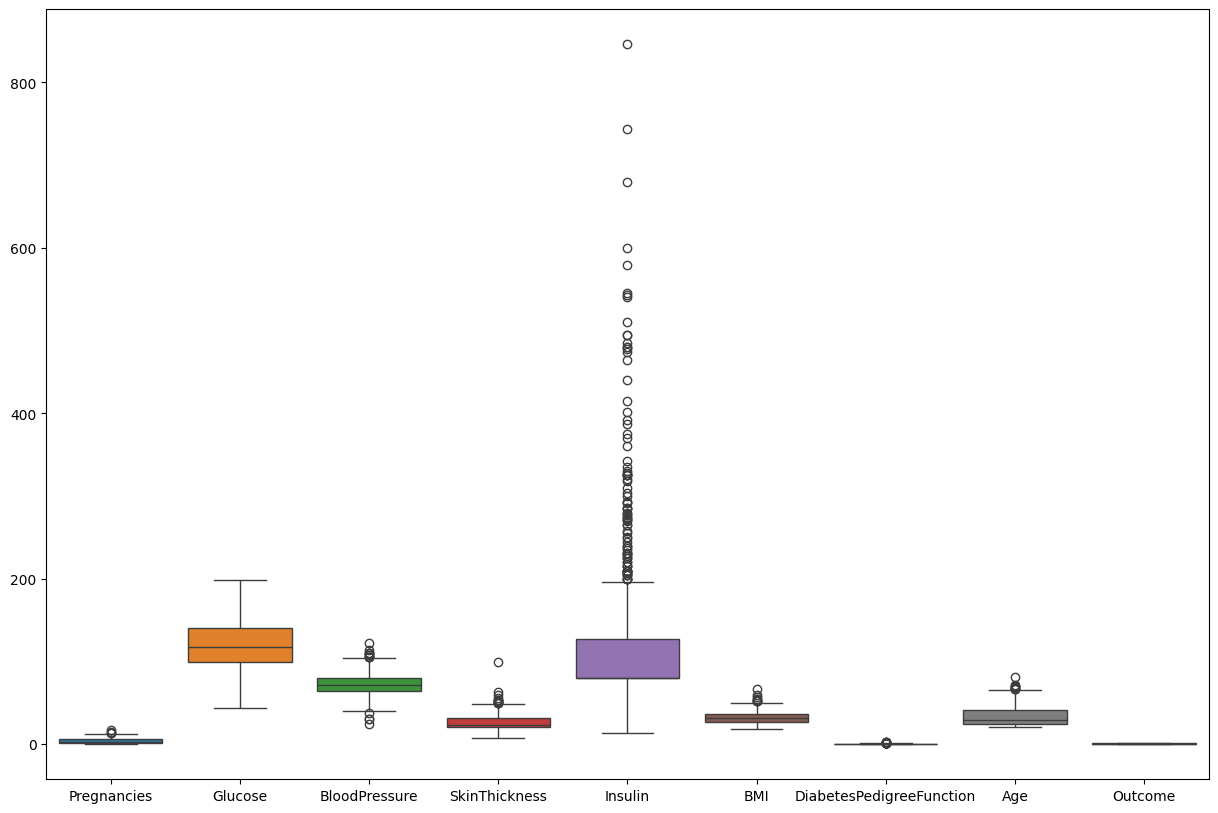

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [10]:
x = df.drop(columns='Outcome',axis = 1)
y = df['Outcome']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
def standardscaler(x_train,x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    pickle.dump(scaler,open('Scaler.pkl','wb'))
    return x_train_scaled,x_test_scaled

In [13]:
x_train_scaled,x_test_scaled = standardscaler(x_train,x_test)

In [14]:
classifier = DecisionTreeClassifier()

In [15]:
parameters = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'splitter' : ['best','random'],
              'max_features' : ['auto' , 'sqrt' , 'log2'],
              'max_depth' : [1,2,3,4,5]}


# parameters =  {'criterion' : ['gini', 'entropy', 'log_loss'],
#                'splitter' : ['best','random'],
#                'max_depth' : [1,2,3,4,5],
#                'max_features':['auto' ,'sqrt', 'log2']
# 

In [16]:
clf = GridSearchCV(classifier,param_grid=parameters,cv=5,scoring='accuracy',verbose=True)

In [17]:
clf.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=True)

In [76]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [77]:
classifier = DecisionTreeClassifier(criterion='log_loss',max_depth=5,max_features='log2',splitter='random')

In [78]:
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2',
                       splitter='random')

In [79]:
y_pred_tree = classifier.predict(x_test_scaled)

In [80]:
print(accuracy_score(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

0.6510416666666666
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       123
           1       0.53      0.23      0.32        69

    accuracy                           0.65       192
   macro avg       0.60      0.56      0.54       192
weighted avg       0.62      0.65      0.61       192



In [23]:
conf_m =confusion_matrix(y_test,y_pred_tree) 
print(conf_m)
true_positive = conf_m[0][0]
false_positive = conf_m[0][1]
false_negative = conf_m[1][0]
true_negative = conf_m[1][1]

[[110  13]
 [ 54  15]]


In [24]:
accuracy  = (true_negative+true_positive)/(true_negative+true_positive+false_negative+false_positive)
print(accuracy)

0.6510416666666666


In [25]:
precision = true_positive/(true_positive+false_positive)
print(precision)

0.8943089430894309


In [26]:
recall = true_positive/(true_positive+false_negative)
print(recall)

0.6707317073170732


In [27]:
f1_Score = 2*(recall*precision)/(recall+precision)
f1_Score

0.7665505226480838

In [28]:
svc = SVC()

In [29]:
parameters = {'C' : [0.1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001],
              'kernel' : ['linear', 'rbf', 'sigmoid']
             }
                

In [31]:
clf_svc = GridSearchCV(SVC(),param_grid=parameters,cv=5,scoring='accuracy',verbose=3)

In [32]:
clf_svc.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.784 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.765 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.672 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [41]:
y_pred_svc = clf_svc.predict(x_test_scaled)

In [69]:
print(accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
conf_m =confusion_matrix(y_test,y_pred_svc) 
print(conf_m)
true_positive = conf_m[0][0]
false_positive = conf_m[0][1]
false_negative = conf_m[1][0]
true_negative = conf_m[1][1]

0.7395833333333334
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       123
           1       0.66      0.58      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.73      0.74      0.74       192

[[102  21]
 [ 29  40]]


In [70]:
accuracy  = (true_negative+true_positive)/(true_negative+true_positive+false_negative+false_positive)
print(accuracy)

0.7395833333333334


In [71]:
precision = true_positive/(true_positive+false_positive)
print(precision)

0.8292682926829268


In [72]:
recall = true_positive/(true_positive+false_negative)
print(recall)

0.7786259541984732


In [73]:
f1_Score = 2*(recall*precision)/(recall+precision)
f1_Score

0.8031496062992125

In [74]:
gnb = GaussianNB()

In [49]:
gnb.fit(x_train_scaled,y_train)

GaussianNB()

In [50]:
y_pred_gnb = gnb.predict(x_test_scaled)

In [68]:
print(accuracy_score(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))
conf_m =confusion_matrix(y_test,y_pred_gnb) 
print(conf_m)
true_positive = conf_m[0][0]
false_positive = conf_m[0][1]
false_negative = conf_m[1][0]
true_negative = conf_m[1][1]

0.7291666666666666
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

[[95 28]
 [24 45]]


In [52]:
bnb = BernoulliNB()

In [53]:
bnb.fit(x_train_scaled,y_train)

BernoulliNB()

In [54]:
y_pred_bnb = bnb.predict(x_test_scaled)

In [67]:
print(accuracy_score(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))
conf_m =confusion_matrix(y_test,y_pred_bnb) 
print(conf_m)
true_positive = conf_m[0][0]
false_positive = conf_m[0][1]
false_negative = conf_m[1][0]
true_negative = conf_m[1][1]

0.6927083333333334
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       123
           1       0.57      0.58      0.58        69

    accuracy                           0.69       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.69      0.69      0.69       192

[[93 30]
 [29 40]]


In [58]:
parameters = {'penalty' : ('l1', 'l2', 'elasticnet', None),'C':np.logspace(-3,3,7),'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga' ]}


In [57]:
lr = LogisticRegression()

In [59]:
clf_lr = GridSearchCV(LogisticRegression(),param_grid=parameters,cv=5,scoring='accuracy',verbose=3)

In [60]:
clf_lr.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.655 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.652 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.652 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.652 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.661 total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [61]:
clf_lr.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [62]:
lr = LogisticRegression(C=0.1,penalty='l1',solver='liblinear')

In [63]:
lr.fit(x_train_scaled,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [64]:
y_pred_lr = lr.predict(x_test_scaled)

In [66]:
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
conf_m =confusion_matrix(y_test,y_pred_lr) 
print(conf_m)
true_positive = conf_m[0][0]
false_positive = conf_m[0][1]
false_negative = conf_m[1][0]
true_negative = conf_m[1][1]

0.7291666666666666
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192

[[99 24]
 [28 41]]


In [82]:
pickle.dump(svc,open('SVC.pkl','wb'))